✅ Data loaded successfully!
Training samples: 50000
Epoch 1/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 717s 2s/step - accuracy: 0.3259 - loss: 1.8990 - val_accuracy: 0.5295 - val_loss: 1.3648
Epoch 2/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 758s 2s/step - accuracy: 0.5057 - loss: 1.4143 - val_accuracy: 0.5556 - val_loss: 1.2719
391/391 ━━━━━━━━━━━━━━━━━━━━ 800s 2s/step - accuracy: 0.5445 - loss: 1.3098 - val_accuracy: 0.5913 - val_loss: 1.1732

✅ Final Test Accuracy: 59.13%


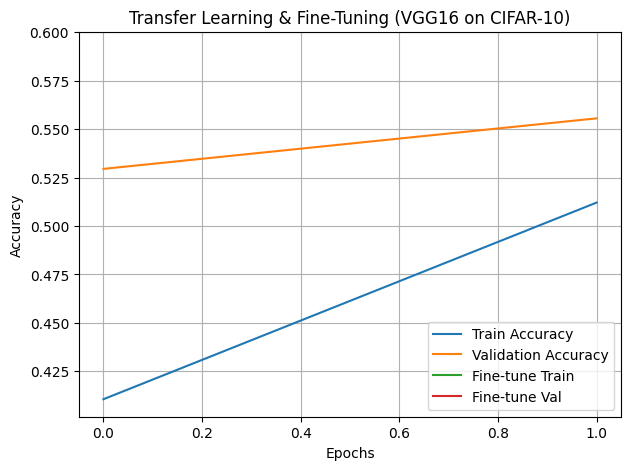

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step

Predicted Class: Frog


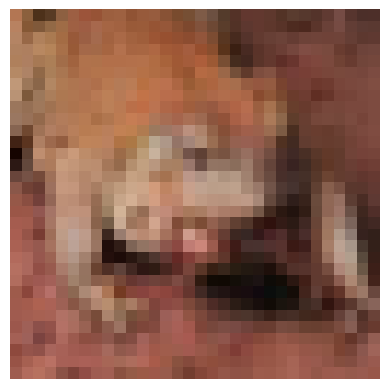

In [ ]:
# Import Required Libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# -------------------------------
# Load and Preprocess CIFAR-10 Dataset
# -------------------------------
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("✅ Data loaded successfully!")
print("Training samples:", X_train.shape[0])

# -------------------------------
# Load Pre-trained VGG16 Model
# -------------------------------
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze base mo⁵del layers
for layer in base_model.layers:
    layer.trainable = False

# -------------------------------
# Add Custom Layers
# -------------------------------
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # reduced for speed
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# -------------------------------
# Train Model (FAST MODE — only 2 epochs)
# -------------------------------
history = model.fit(
    X_train, y_train,
    epochs=2,                     # REDUCED from 5 → 2
    validation_data=(X_test, y_test),
    batch_size=128,               # larger batch → faster
    verbose=1
)

# -------------------------------
# Fine-Tuning (very light)
# -------------------------------
for layer in base_model.layers[-2:]:     # only last 2 layers
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_fine = model.fit(
    X_train, y_train,
    epochs=1,                     # REDUCED from 3 → 1
    validation_data=(X_test, y_test),
    batch_size=128,
    verbose=1
)

# -------------------------------
# Evaluation
# -------------------------------
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Final Test Accuracy: {acc*100:.2f}%")

# -------------------------------
# Plot Accuracy
# -------------------------------
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine.history['accuracy'], label='Fine-tune Train')
plt.plot(history_fine.history['val_accuracy'], label='Fine-tune Val')
plt.title('Transfer Learning & Fine-Tuning (VGG16 on CIFAR-10)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# Predict a Single Image
# -------------------------------
import numpy as np

idx = 5
img = X_test[idx]
plt.imshow(img)
plt.axis('off')

img_batch = np.expand_dims(img, axis=0)
pred = model.predict(img_batch)

classes = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
print("\nPredicted Class:", classes[np.argmax(pred)])
